# 1. Import libraries

In [41]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

# Mahcine learning model
from sklearn.cluster import KMeans

# 2. Read dataset

In [42]:
df = pd.read_csv('Mall_Customers.csv')

### Dataset Attributes
- CustomerID : Unique ID of the customer
- Gender : Gender of the customer (Male or Female)
- Age : Age of the customer
- Annual Income (k$) : Annual Income of the customer
- Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

# 3. Dataset Information

In [43]:
df.shape

(200, 5)

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Summary
- No null values
- 200 Records
- Average age is 38
- Average income is 60k (Almost the same as the average for US citizins)
- Spending score has a mean of 50

# 4. Exploratory Data Analysis

## 4.1 Distributions

### 4.1.1 Distributions of numeric features

<Figure size 1500x500 with 0 Axes>

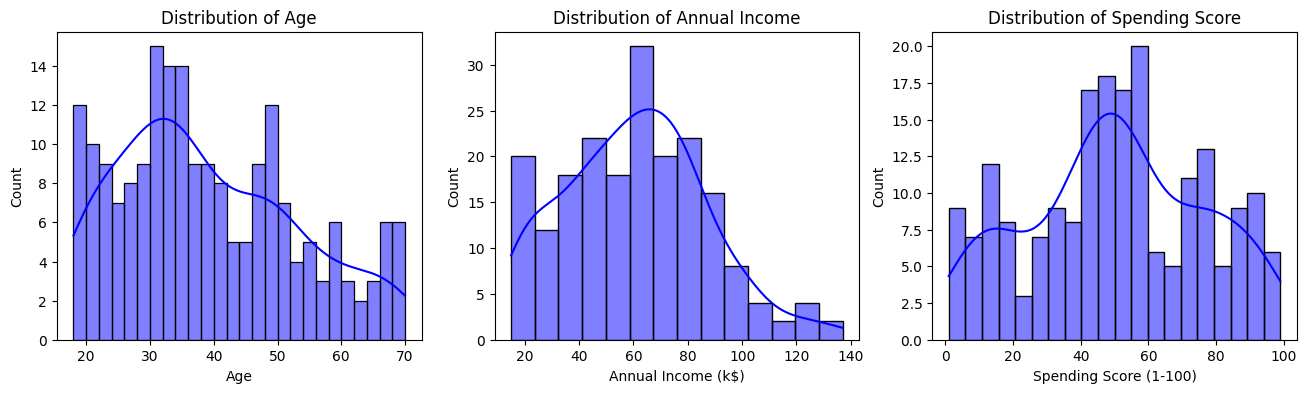

In [48]:
# Set the overall figure size
plt.figure(figsize=(15,5))

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Plot 1: Age distribution
sns.histplot(df['Age'], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Annual Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Plot 3: Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')

# Show the plots
plt.show()

#### **Insights**

**1. Age**
- The Age is spread across different age groups.
- Most mall visitors are between 20-40, with the peak age is in the 30-35 range.
- Less visitors are over the age of 50.

   **Conclusion**: The mall primarily attracts young to middle aged customers with a peak around 30 years old.

---

**2. Annual Income**
- Most visitors have an income between 40k-80k, with the peak at 60k.
- there is a right skew, less visitors has an income over 100k.

   **Conclusion**: The mall's customer base is dominated by middle-income earners.

---

**3. Spending Score**
- Spending score is normally distributed.
- Most visitors spend with a score 40-60.
- There are customers with very low and very high spending score.

   **Conclusion**: Most of the mall's customers are moderate spenders but still are spread normally.



### 4.1.2 Distributions of categorial features

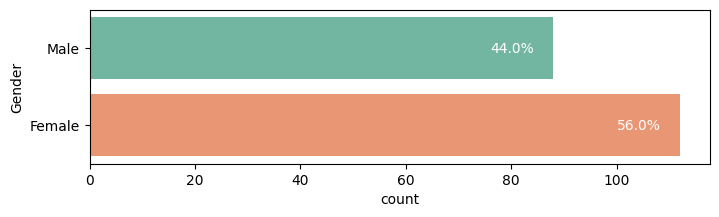

In [49]:
gender_counts = df['Gender'].value_counts() # Returns a map {gender: count}

plt.figure(1 , figsize = (8 , 2))
sns.countplot(y = 'Gender', hue='Gender', data = df, palette='Set2')

for i in df['Gender'].unique():
    count = gender_counts[i]
    percentage = (count / df.shape[0]) * 100
    plt.text(count - 12, i, f'{percentage:.1f}%', va='center', color='w')

plt.grid(False)
plt.show()

#### **Insights**

**Gender**
- The gender distribution is fairly balanced with a 56% female and 44% male customers.
- Slight female majority with 6% difference.

   **Conclusion**: The females make up a slightly larger share of the customer base of the mall.

### 4.1.3 Distributions of numeric features wrt categorial features

<Figure size 800x600 with 0 Axes>

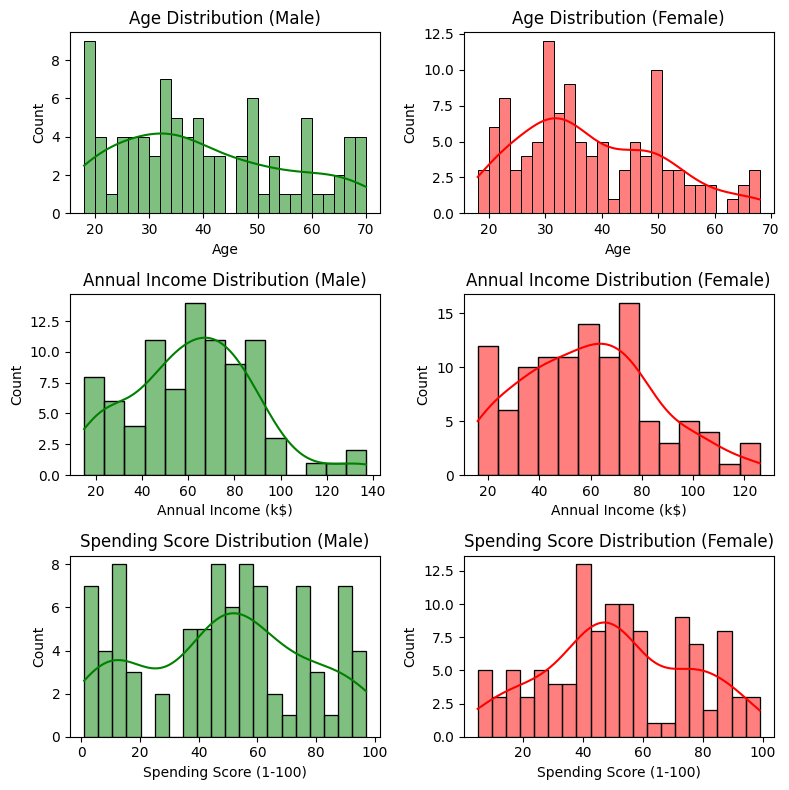

In [50]:
# Set the overall figure size
plt.figure(figsize=(8, 6))

# Create subplots: 3 rows, 2 columns (for 6 plots)
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Plot 1: Age distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Age'], kde=True, color='g', ax=axes[0, 0], bins=26)
axes[0, 0].set_title('Age Distribution (Male)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Age distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Age'], kde=True, color='r', ax=axes[0, 1], bins=26)
axes[0, 1].set_title('Age Distribution (Female)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Plot 3: Annual Income distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Annual Income (k$)'], kde=True, color='g', ax=axes[1, 0], bins=14)
axes[1, 0].set_title('Annual Income Distribution (Male)')
axes[1, 0].set_xlabel('Annual Income (k$)')
axes[1, 0].set_ylabel('Count')

# Plot 4: Annual Income distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Annual Income (k$)'], kde=True, color='r', ax=axes[1, 1], bins=14)
axes[1, 1].set_title('Annual Income Distribution (Female)')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Count')

# Plot 5: Spending Score distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Spending Score (1-100)'], kde=True, color='g', ax=axes[2, 0], bins=20)
axes[2, 0].set_title('Spending Score Distribution (Male)')
axes[2, 0].set_xlabel('Spending Score (1-100)')
axes[2, 0].set_ylabel('Count')

# Plot 6: Spending Score distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Spending Score (1-100)'], kde=True, color='r', ax=axes[2, 1], bins=20)
axes[2, 1].set_title('Spending Score Distribution (Female)')
axes[2, 1].set_xlabel('Spending Score (1-100)')
axes[2, 1].set_ylabel('Count')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<Figure size 1500x800 with 0 Axes>

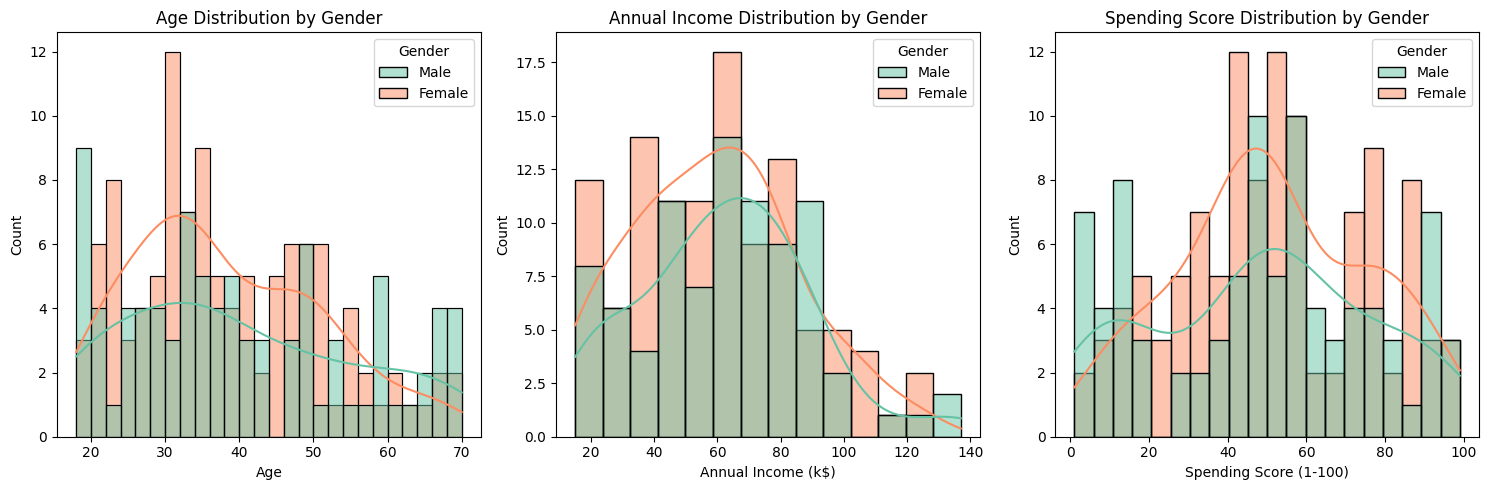

In [51]:
# Set the overall figure size
plt.figure(figsize=(15, 8))

# Create subplots: 1 row, 3 columns for 3 plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Age distribution for both genders
sns.histplot(df, x='Age', hue='Gender', kde=True, ax=axes[0], bins=26, palette='Set2')
axes[0].set_title('Age Distribution by Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Annual Income distribution for both genders
sns.histplot(df, x='Annual Income (k$)', hue='Gender', kde=True, ax=axes[1], bins=14, palette='Set2')
axes[1].set_title('Annual Income Distribution by Gender')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Plot 3: Spending Score distribution for both genders
sns.histplot(df, x='Spending Score (1-100)', hue='Gender', kde=True, ax=axes[2], bins=20, palette='Set2')
axes[2].set_title('Spending Score Distribution by Gender')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


## 4.2 Relationships between features

### 4.2.1 Numerical vs Numerical with respect to Gender

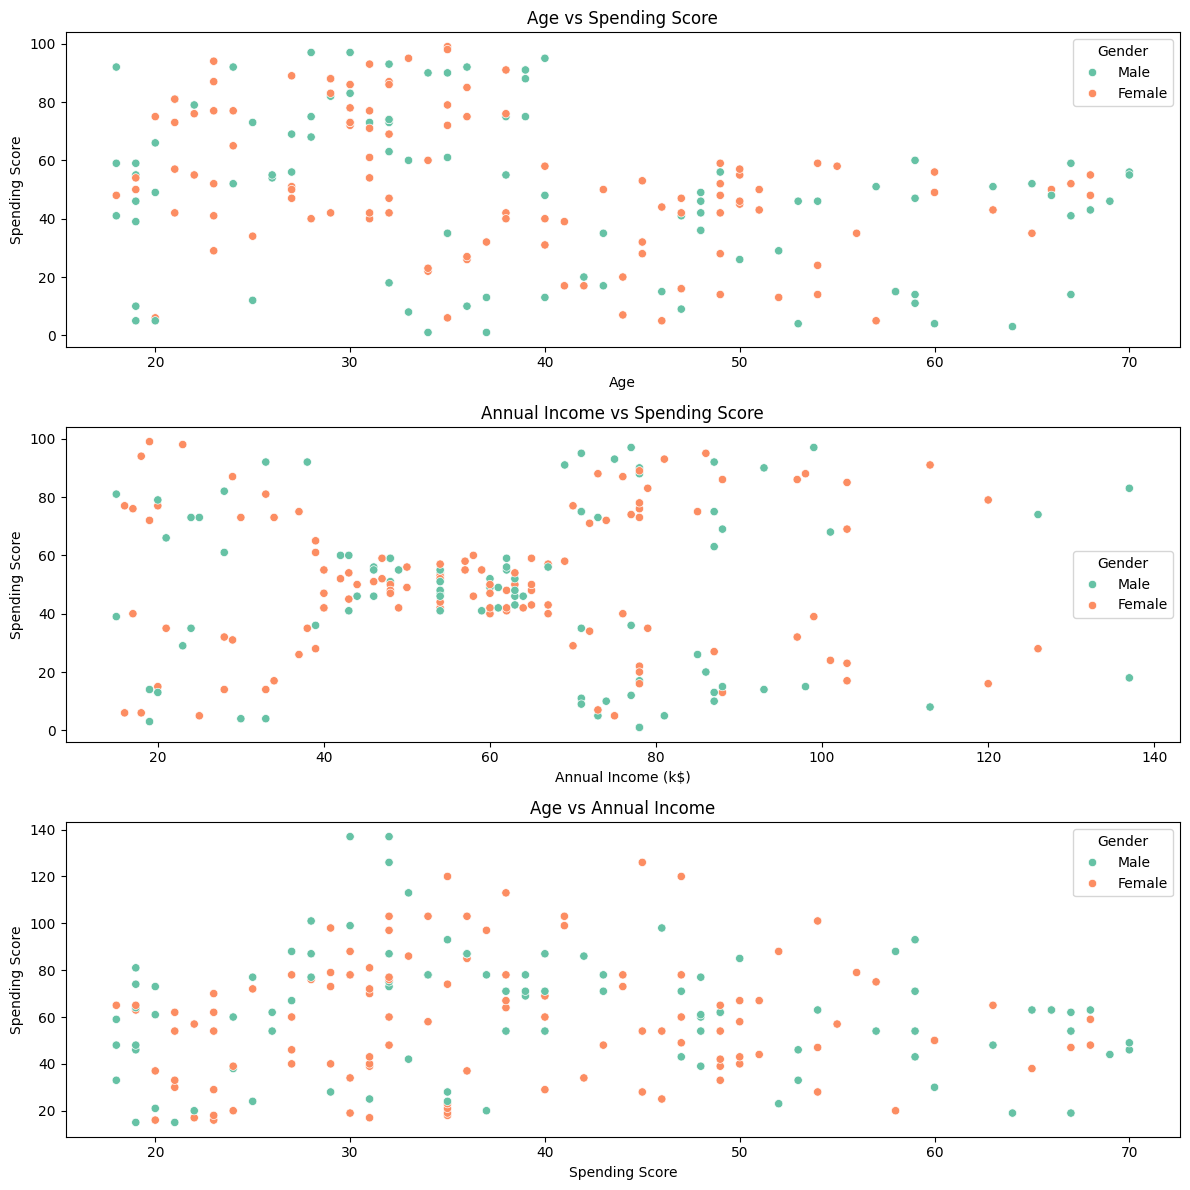

In [52]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column, adjusting figure size for better view

# Scatter plot for Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Spending Score')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Spending Score')

# Scatter plot for Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Annual Income vs Spending Score')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score')

# Scatter plot for Spending Score (Self-loop) - if you need comparison against itself
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Age vs Annual Income')
axes[2].set_xlabel('Spending Score')
axes[2].set_ylabel('Spending Score')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### **Insights**

- As we can see the plot with respect to gender doesn't seem to have any impact on the clusters.
- The Spending Score vs Annual Income is the only plot that we can see some clusters forming.

   **Conclusion**: Let's drop the gender feature



### 4.2.2 3D Plot between the most important features

In [53]:
# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Age'],
    y=df['Annual Income (k$)'],
    z=df['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        size=4,
        opacity=0.7,
    )
)])

# Adding axis titles
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)'
    ),
    title='3D Interactive Scatter Plot of Mall Customers'
)

# Show the plot
fig.show()


#### **Insights**
- We have 5-6 clusters that this graph shows

# 5. Clustering using K-Means

## 5.1 Choose the number of clusters using the elbow method

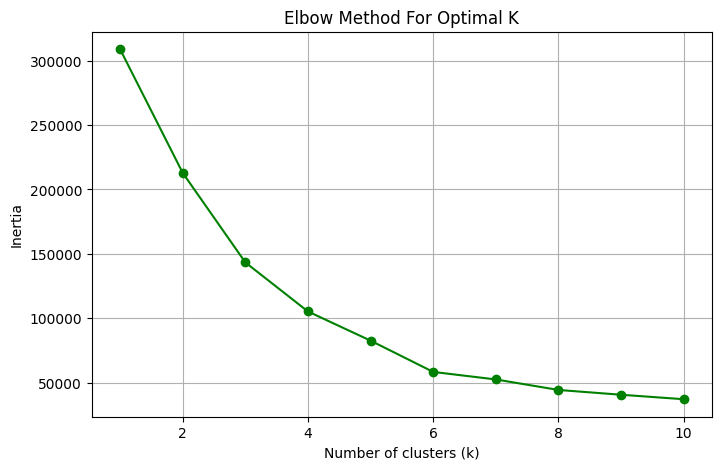

In [54]:
# Define a range of potential cluster numbers
k_values = range(1, 11)
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=00)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color='g')
plt.title('Elbow Method For Optimal K', color='black')
plt.xlabel('Number of clusters (k)', color='black')
plt.ylabel('Inertia', color='black')
plt.grid(True)
plt.show()

- Let's try both 5 and 6 clusters

## 5.2 K-Means clustering

### 5.2.1 Clustering at k=5

In [55]:
# Copy the data
df_k5 = df.copy(deep=True)

# Apply KMeans clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=00)
df_k5['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Check the cluster assignments
df_k5.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
40,41,Female,65,38,35,0
119,120,Female,50,67,57,4
62,63,Female,67,47,52,0
105,106,Female,21,62,42,4
157,158,Female,30,78,78,1


In [56]:
# Create a 3D scatter plot with clusters
fig = go.Figure()

# Define a list of colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add data for each cluster to the plot
for cluster in range(5):
    clustered_data = df_k5[df_k5['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=clustered_data['Age'],
        y=clustered_data['Annual Income (k$)'],
        z=clustered_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cluster],
            opacity=0.8,
        ),
        name=f'Cluster {cluster + 1}'
    ))

# Set titles for the axes
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)'
    ),
    title='3D Interactive Scatter Plot of Mall Customers Clusters'
)

# Show the interactive plot
fig.show()

- The center of the data doesn't seem right here

### 5.2.1 Clustering at k=5

In [57]:
# Copy the data
df_k6 = df.copy(deep=True)

# Apply KMeans clustering with K=5
kmeans = KMeans(n_clusters=6, random_state=00)
df_k6['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Check the cluster assignments
df_k6.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
22,23,Female,46,25,5,2
48,49,Female,29,40,42,4
188,189,Female,41,103,17,3
147,148,Female,32,77,74,1
183,184,Female,29,98,88,1


In [59]:
# Create a 3D scatter plot with clusters
fig = go.Figure()

# Define a list of colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add data for each cluster to the plot
for cluster in range(5):
    clustered_data = df_k6[df_k6['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=clustered_data['Age'],
        y=clustered_data['Annual Income (k$)'],
        z=clustered_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cluster],
            opacity=0.8,
        ),
        name=f'Cluster {cluster + 1}'
    ))

# Set titles for the axes
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)'
    ),
    title='3D Interactive Scatter Plot of Mall Customers Clusters'
)

# Show the interactive plot
fig.show()

- This obviously has the best results